In [1]:
from matplotlib import pyplot as plt
import numpy as np
from math import sqrt, exp
__JVERSION__ = "1.0"
__JDATE__ = "8/Jan/2023"
print(f"AMM Order Book Maths Version v{__JVERSION__} ({__JDATE__})")

AMM Order Book Maths Version v1.0 (8/Jan/2023)


# AMM Order Book Maths

_companion sheet to the desk note published January 2023 that is available [here][note]_

[note]:qqq

## Cumulative order book

$$
k = x_0\cdot y_0 \\
P_0 = \frac {y_0}{x_0} \\
y(x) = \frac k x \\
P(x) = -y'(x) = \frac k {x^2}
$$

The cumulative orderbook is given by $x(P)$ and $y(P)$, ie reverting the function $P(x)$ and converting from $x$ to $y$ if need be. One minor points is that we use $\Delta x + x_0 = x$ and $\Delta y + y_0 = y$ on the horizontal axis. This yields

$$
\Delta x(P) = 
\left| \sqrt{\frac{k}{P}} - \sqrt{\frac{k}{P_0}} \right| = 
x_0 \left| \sqrt{\frac{P_0}{P}} - 1 \right|
$$
and 
$$
\Delta y(P) = 
\sqrt{k} \left| \sqrt{P} - \sqrt{P_0}\right| = 
y_0 \left| \sqrt{\frac{P}{P_0}} - 1 \right|
$$

#### Chart `ammob_cumuleth` and  `ammob_cumulusdc` and  `ammob_cumulusdcr`

x0=10ETH, y0=10000USDC p0=1000.0USDC per ETH


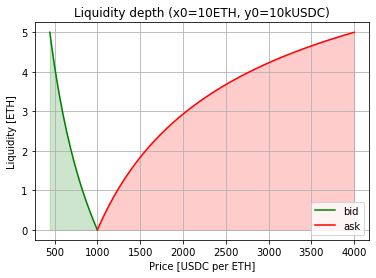

In [2]:
k   = 100000
x0  = 10
y0  = k/x0
p0  = y0/x0
print(f"x0={x0}ETH, y0={y0:.0f}USDC p0={k/x0**2}USDC per ETH")

dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

p_rbid = [k/(x0+dx)**2 for dx in dx_rbid]
p_rask = [k/(x0+dx)**2 for dx in dx_rask]
plt.plot(p_rbid, dx_rbid, color="green", label="bid")
plt.fill_between(p_rbid, dx_rbid, color="green", alpha=0.2)
plt.plot(p_rask, -dx_rask, color="red", label="ask")
plt.fill_between(p_rask, -dx_rask, color="red", alpha=0.2)
plt.title(f"Liquidity depth (x0={x0}ETH, y0={y0/1000:.0f}kUSDC)")
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity [ETH]")
plt.legend()
plt.grid()

p = 444 ... 4000


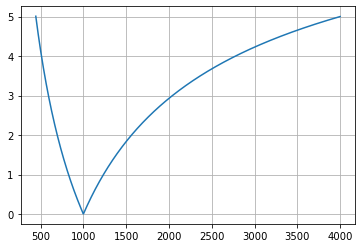

In [3]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_r = np.linspace(444, 4000, 1000)
plt.plot(p_r, [x0*abs(sqrt(p0/p)-1) for p in p_r])
plt.grid()

x0=10ETH, y0=10000USDC p0=1000.0USDC per ETH


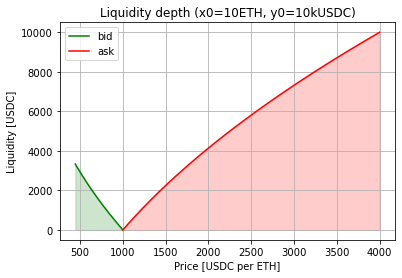

In [4]:
print(f"x0={x0}ETH, y0={y0:.0f}USDC p0={k/x0**2}USDC per ETH")
dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

dy_rask = np.array([(k/(x0+dx))-y0 for dx in dx_rask])
dy_rbid = np.array([(k/(x0+dx))-y0 for dx in dx_rbid])

plt.plot(p_rbid, -dy_rbid, color="green", label="bid")
plt.fill_between(p_rbid, -dy_rbid, color="green", alpha=0.2)
plt.plot(p_rask,  dy_rask, color="red", label="ask")
plt.fill_between(p_rask, dy_rask, color="red", alpha=0.2)
plt.title(f"Liquidity depth (x0={x0}ETH, y0={y0/1000:.0f}kUSDC)")
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity [USDC]")
plt.legend()
plt.grid()

p = 444 ... 4000


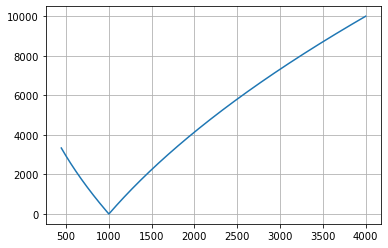

In [5]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_r = np.linspace(444, 4000, 1000)
#plt.plot(p_r, [sqrt(k)*abs(sqrt(p)-sqrt(p0)) for p in p_r])
plt.plot(p_r, [y0*abs(sqrt(p/p0)-1) for p in p_r])
plt.grid()

x0=10ETH, y0=10000USDC p0=1000.0USDC per ETH


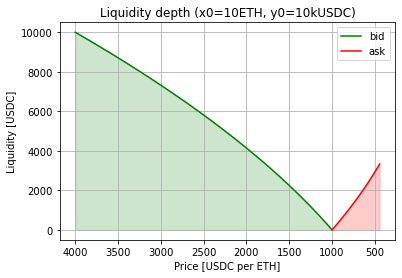

In [6]:
print(f"x0={x0}ETH, y0={y0:.0f}USDC p0={k/x0**2}USDC per ETH")
dx_rask = np.linspace(-5, 0, 500)
dx_rbid = np.linspace( 0, 5, 500)

dy_rask = np.array([(k/(x0+dx))-y0 for dx in dx_rask])
dy_rbid = np.array([(k/(x0+dx))-y0 for dx in dx_rbid])

_, plt1 = plt.subplots(1,1)
plt.plot(p_rask,  dy_rask, color="green", label="bid")
plt.fill_between(p_rask, dy_rask, color="green", alpha=0.2)
plt.plot(p_rbid, -dy_rbid, color="red", label="ask")
plt.fill_between(p_rbid, -dy_rbid, color="red", alpha=0.2)
plt.title(f"Liquidity depth (x0={x0}ETH, y0={y0/1000:.0f}kUSDC)")
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity [USDC]")
plt.legend()
plt1.invert_xaxis()
plt.grid()

## Marginal order book

$$
\Delta x'(P) = \frac 1 {y''(x(P))}
$$

$$
\Delta y'(P) = P \Delta x'(P) = \frac P {y''(x(P))}
$$

$$
\Delta x'(P) = 
\frac{\sqrt{k}}{2 \sqrt{P^3}}
$$
and 
$$
\Delta y'(P)= 
\frac{\sqrt{k}}
  {2 \sqrt{P}}
$$

#### Chart `ammob_margeth` and  `ammob_margusdc` and  `ammob_margusdcr`

p = 444 ... 4000


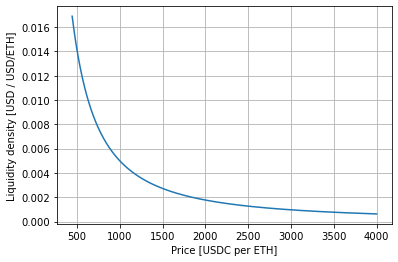

In [7]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_r = np.linspace(444, 4000, 1000)
#plt.plot(p_r, [sqrt(k)*abs(sqrt(p)-sqrt(p0)) for p in p_r])
plt.plot(p_r, [sqrt(k)/(2*(sqrt(p**3))) for p in p_r])
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity density [USD / USD/ETH]")
plt.grid()

p = 444 ... 4000


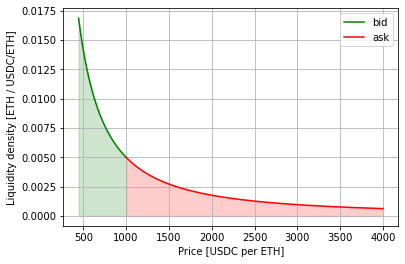

In [8]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rbid], color="green", label="bid")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rbid], color="green", alpha=0.2)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rask], color="red", label="ask")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p**3))) for p in p_rask], color="red", alpha=0.2)
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity density [ETH / USDC/ETH]")
plt.legend()
plt.grid()

p = 444 ... 4000


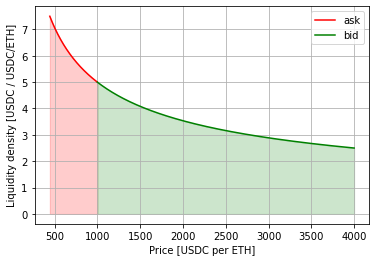

In [9]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", label="ask")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", alpha=0.2)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", label="bid")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", alpha=0.2)
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity density [USDC / USDC/ETH]")
plt.legend()
plt.grid()

p = 444 ... 4000


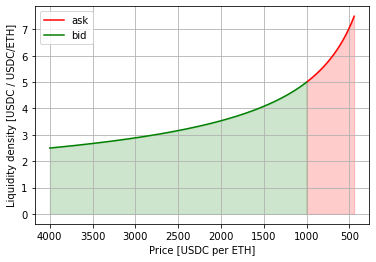

In [10]:
print(f"p = {min(p_rbid):.0f} ... {max(p_rask):.0f}")
p_rbid = np.linspace(min(p_rbid), p0, 500)
p_rask = np.linspace(p0, max(p_rask), 500)

_, plt1 = plt.subplots(1,1)
plt.plot(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", label="ask")
plt.fill_between(p_rbid, [sqrt(k)/(2*(sqrt(p))) for p in p_rbid], color="red", alpha=0.2)
plt.plot(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", label="bid")
plt.fill_between(p_rask, [sqrt(k)/(2*(sqrt(p))) for p in p_rask], color="green", alpha=0.2)
plt.xlabel("Price [USDC per ETH]")
plt.ylabel("Liquidity density [USDC / USDC/ETH]")
plt.legend()
plt1.invert_xaxis()
plt.grid()